# **Task 4**

## **DJS Synapse Learning Period**
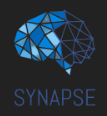

Congratulations on making it this far!! Welcome to the world of classification where we move on from unsupervised to helping the algorithms by telling them exactly what the data we're feeding them is. This week we'll be looking into  many algorithms such as Decision Trees, SVC, Naive Bayes, Random Forest and so on. We'll also be delving into hyperparameter tuning the only place where ched chaad can lead to a good result.

**Warning: This task contains many theory questions. Proceed with caution!**

Jk, make sure you research well and make sure you are understanding the models y'all are implementing as that will make your concepts much stronger and build a strong ML foundation which will be very useful as we move further with the tasks.

### Overfitting and Underfitting [VERY IMPORTANT]:
https://www.youtube.com/watch?v=T9NtOa-IITo
Note : This concept can be seen in K Means and decision trees. In fact, we will look deeper into
this when we begin deep learning.

## Importing the dataset

Use this link to download the adult income dataset and upload it to your drive.

https://drive.google.com/file/d/1VAE1qF16D-sKnBOWXzGXVNGhtNZNLFQS/view?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import your dataset here
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Synapse/adult_income_dataset.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Dealing with Nan values

In [ ]:
#write a code to find the nan values for the dataset and make a decision on whether to dropna or fill na
df = df.dropna()
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Object Valued Columns

For Relationship, Race and Sex find out the max division average fnlwgt for each unique value.

In [ ]:
#Write your code here
for i in ['relationship', 'race','sex']:
  print(df.groupby(i)['fnlwgt'].mean())

relationship
Husband           186819.673754
Not-in-family     191680.809345
Other-relative    206017.299213
Own-child         193500.518361
Unmarried         190790.042030
Wife              181480.642248
Name: fnlwgt, dtype: float64
race
Amer-Indian-Eskimo    123491.944056
Asian-Pac-Islander    159337.400000
Black                 228807.455449
Other                 195772.238095
White                 187285.002159
Name: fnlwgt, dtype: float64
sex
Female    185926.150480
Male      191650.246075
Name: fnlwgt, dtype: float64


In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

## Getting rid of unnecessary columns

*   Drop the education num column since we already have their education in the form of categories
*   Check the combinations of the marital-status and relationship column, see if we need both of them or just marital status will work too.


In [ ]:
#write your code here
df = df.drop('education-num',axis=1)
df

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Dealing with Categorical Data
As you probably know by now, the ML models dont know how to deal with String or object type data... so your mission shall you choose to accept it (don't really have much of a choice) is to find out which columns to do one hot encoding on and which columns to do Label Encoding on.

**Hint: Since Marital-status has less number of columns, One Hot encode it**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   marital-status  30162 non-null  object
 5   occupation      30162 non-null  object
 6   relationship    30162 non-null  object
 7   race            30162 non-null  object
 8   sex             30162 non-null  object
 9   capital-gain    30162 non-null  int64 
 10  capital-loss    30162 non-null  int64 
 11  hours-per-week  30162 non-null  int64 
 12  native-country  30162 non-null  object
 13  income          30162 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.5+ MB


In [ ]:
#Write your code here
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['education','occupation','native-country']
for i in cols:
  print(f'{i}: {len(list(df[i].unique()))}')
ohe_cols = ['workclass','marital-status','relationship','race','sex']
df = pd.get_dummies(df, columns = ohe_cols,dtype = int)
for i in cols:
      df[i] = le.fit_transform(df[i])
df

education: 16
occupation: 14
native-country: 41


,age,fnlwgt,education,occupation,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_Federal-gov,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,39,77516,9,0,2174,0,40,38,<=50K,0,...,0,0,0,0,0,0,0,1,0,1
1,50,83311,9,3,0,0,13,38,<=50K,0,...,0,0,0,0,0,0,0,1,0,1
2,38,215646,11,5,0,0,40,38,<=50K,0,...,0,0,0,0,0,0,0,1,0,1
3,53,234721,1,5,0,0,40,38,<=50K,0,...,0,0,0,0,0,1,0,0,0,1
4,28,338409,9,9,0,0,40,4,<=50K,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,7,12,0,0,38,38,<=50K,0,...,0,0,1,0,0,0,0,1,1,0
32557,40,154374,11,6,0,0,40,38,>50K,0,...,0,0,0,0,0,0,0,1,0,1
32558,58,151910,11,0,0,0,40,38,<=50K,0,...,0,1,0,0,0,0,0,1,1,0
32559,22,201490,11,0,0,0,20,38,<=50K,0,...,1,0,0,0,0,0,0,1,0,1


## Altering the Target Column
Modify the Target Column (income) to make sure that all the values which are <=50K are replaced with a 0 and the values >50K are replaced with a 1.

In [ ]:
#write your code here
df['income'] = df['income'].apply(lambda x: 0 if x == '<=50K' else 1)

**Extract the target column(income) and store it in a seperate variable and remove it from the original dataset. Additionally, do a 70:30 Train Test Split**

In [ ]:
#write your code here
from sklearn.model_selection import train_test_split
y = df['income']
df = df.drop('income',axis=1)
X_train,X_test,y_train,y_test = train_test_split(df,y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(21113, 35)
(9049, 35)
(21113,)
(9049,)


### Chalo now that we have the preprocessed data we can feed it into the models. Lets start with some basic ones.

# Logistic Regression
*   Theory:https://www.youtube.com/watch?v=yIYKR4sgzI8&list=PLblh5JKOoLUKxzEP5HA2d-Li7IJkHfXSe
*   Implementation: https://www.youtube.com/watch?v=n40hS9tQmcY


Explain the algorithm, its working and its use cases.

In [ ]:
#import the model and apply it to the data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Find the accuracy and confusion matrix for the same and explain what it shows.

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.7784285556415074
Confusion Matrix:
[[6432  355]
 [1650  612]]


# Naive Bayes Algorithm

* Theory : https://youtu.be/jS1CKhALUBQ
* Theory:
https://www.analyticsvidhya.com/blog/2021/09/naive-bayes-algorithm-a-complete-guide-for-data-science-enthusiasts/
* Implementation : https://youtu.be/nHIUYwN-5rM

In [ ]:
#import the model from sklearn and apply it to your data
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7729030832136148


# Decision Tree Classifier
* Theory : https://youtu.be/7VeUPuFGJHk
* Theory: https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/
* Implementation : https://youtu.be/HY2DcBhgwm0

In [ ]:
#import the decision tree from sklearn and run it on your data
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=10)
dt_model.fit(X_train,y_train)
print(dt_model.score(X_train,y_train))
print(dt_model.score(X_test,y_test))


0.9999526358167954
0.8020775776328876


<b>Print the Model Accuracy</b>

In [ ]:
y_pred = dt_model.predict_proba(X_test)[:,1]

new_y = []
for i in range(len(y_pred)):
  if y_pred[i]<0.6:
    new_y.append(0)
  else:
    new_y.append(1)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, new_y)

0.8020775776328876

## Explain: What are the differences in the working of Logistic Regression, Naive Bayes and Decision Tree and explain why are the accuracies are different.

Ans:

### Mention some real life use cases for each of these three models:

Ans:

Now that you have your first result, make sure that you play with the hyperparameters to get a better result. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

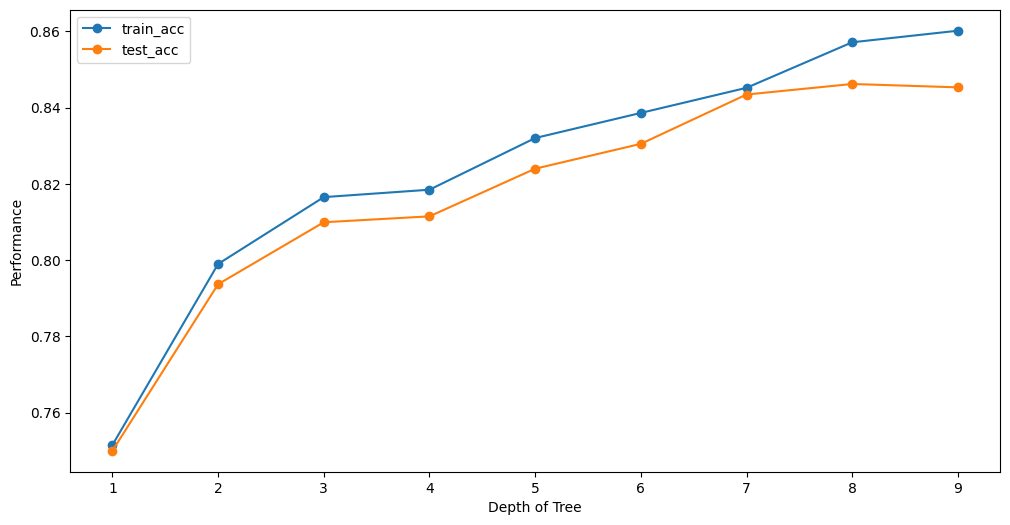

In [ ]:
#plot a graph that shows the train and test accuracy for increasing depth of the tree (do for 10)
train_accuracy = []
test_accuracy = []
for i in range(1,10):
  dt_model = DecisionTreeClassifier(max_depth=i, random_state=10)
  dt_model.fit(X_train,y_train)
  train_accuracy.append(dt_model.score(X_train,y_train))
  test_accuracy.append(dt_model.score(X_test,y_test))

frame=pd.DataFrame({'max_depth': range(1,10), 'train_acc': train_accuracy, 'test_acc': test_accuracy})

plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['test_acc'], marker='o')
plt.xlabel('Depth of Tree')
plt.ylabel('Performance')
plt.legend(['train_acc', 'test_acc'])

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=25, random_state=10) # max_depth = depth where test_acc has highest value
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=25, random_state=10)

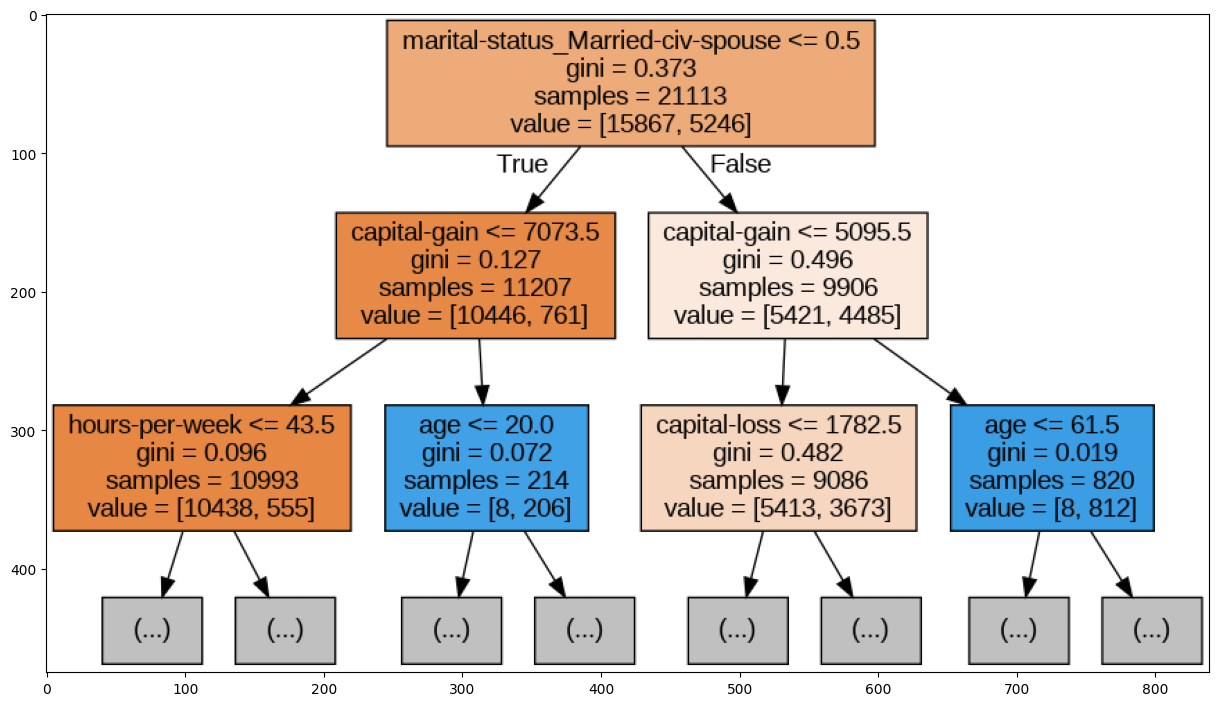

In [ ]:
#complete the code below to create an image of the decision tree
from sklearn import tree
!pip install graphviz
decision_tree = tree.export_graphviz(dt_model, out_file='tree.dot', feature_names=X_train.columns, max_depth=2, filled=True)
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

<b>print the test accuracy and train accuracy here</b>

In [ ]:
#write code here
print(dt_model.score(X_train,y_train))
print(dt_model.score(X_test,y_test))

0.8320466063562734
0.8239584484473422


### Explain the different hyperparameters you changed and how did it affect the models. Also give a summary of the graphs you made.

Ans:

## Optimizing Methods

We can even use Ensemble Methods like **bagging (random forest)**, **boosting (adaboost)** and **Pruning** to improve your accuracy. Again creating a loop of hyperparameters and then finding the best among them is a daunting task. To reduce the efforts, we can use a special technique known as **GridSearchCV**. It finds the best hyperparameters for your model without you having to write multiple loops and evaluating them.

1. GridSearchCV for Random Forest Classifier: https://youtu.be/c4mS7KaOIGY
2. GridSearchCV for Adaboost Classifier: https://youtu.be/JmXnztjULnQ

### 1. Bagging

* Theory : https://www.youtube.com/watch?v=KIOeZ5cFZ50
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Implementation : https://www.youtube.com/watch?v=MxiktOPmhV8&t=2s

In [ ]:
import numpy as np
#implement Random forest
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=10, stop=80, num=10)]
# number of features to consider at every split
max_features=['auto', 'sqrt']
max_depth = [2,4]
# min number of samples required to split the node
min_samples_split = [2,5]
# min number of samples required at each leaf node
min_samples_leaf = [1,2]
# method of selecting sample for each tree
bootstrap = [True, False]

grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator = RandomForestClassifier(), param_grid = grid, cv=3, n_jobs=-1)
rf_grid.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]})

In [ ]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 64}

In [ ]:
print(rf_grid.score(X_train,y_train))
print(rf_grid.score(X_test,y_test))

0.8098328044332875
0.8013040114929827


### Explain the difference between random forest and decision tree. Also think of cases where the outputs for both of them can be same if its possible.

Ans:

In [ ]:
#write a code to implement BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(dt_model, n_estimators = 500, max_samples = 0.5, max_features = 0.5)
bc = bc.fit(X_train, y_train)
print(bc.score(X_train,y_train))
print(bc.score(X_test,y_test))

0.8476294226306067
0.8388772240026522


### Explain how are Bagging and Random Forest different and why do we do bagging?


Ans:

### 2. Boosting

* Theory : https://www.youtube.com/watch?v=NLRO1-jp5F8&t=724s
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
*   Theory:https://www.geeksforgeeks.org/ml-xgboost-extreme-gradient-boosting/
* Implementation : https://www.youtube.com/watch?v=7xHM93WXOu8

In [ ]:
#write code here
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

abc = AdaBoostClassifier()

print(np.mean(cross_val_score(abc,X_train,y_train,scoring='accuracy',cv=10)))
print(np.mean(cross_val_score(abc,X_test,y_test,scoring='accuracy',cv=10)))

0.8552548295005957
0.8533546423507554


Just to make things more interesting implement XGBoost as well and compare its accuracy with that of AdaBoost :)

In [ ]:
!pip install xgboost
import xgboost as xgb
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:34:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8640733782738425
Confusion Matrix:
[[6390  397]
 [ 833 1429]]


### Explain: What is the difference between Adaboost and XGBoost. Also describe in what cases is XGBoost better to use than AdaBoost.

Ans:

## Explain: What is the difference between Bagging and Boosting? Explain with examples

Ans:

### 3. Pruning Techniques



*   Theory: https://opendatascience.com/what-is-pruning-in-machine-learning/
*   Theory:https://towardsdatascience.com/build-better-decision-trees-with-pruning-8f467e73b107



In [ ]:
from sklearn.tree import DecisionTreeClassifier
ccp_alphas = dt_model.cost_complexity_pruning_path(X_train, y_train)["ccp_alphas"]
param_grid = {"ccp_alpha": ccp_alphas}
ccp_grid_alpha_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=10),
    scoring=make_scorer(accuracy_score),
    param_grid=param_grid
)
ccp_grid_alpha_search.fit(X_train, y_train)


GridSearchCV(estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'ccp_alpha': array([0.00000000e+00, 3.14491404e-05, 3.28175765e-05, 7.30135522e-05,
       1.17975615e-04, 1.66127106e-04, 1.78312219e-04, 1.85433974e-04,
       3.68057143e-04, 6.20609497e-04, 8.31863976e-04, 1.26247314e-03,
       1.26434455e-03, 2.25894329e-03, 2.52844755e-03, 5.90108603e-03,
       8.79810567e-03, 1.05615224e-02, 1.65437630e-02, 2.44656654e-02,
       7.37743011e-02])},
             scoring=make_scorer(accuracy_score))

In [ ]:
ccp_grid_alpha_search.best_params_

{'ccp_alpha': 0.0003680571426651451}

In [ ]:
best_ccp_alpha_tree = ccp_grid_alpha_search.best_estimator_

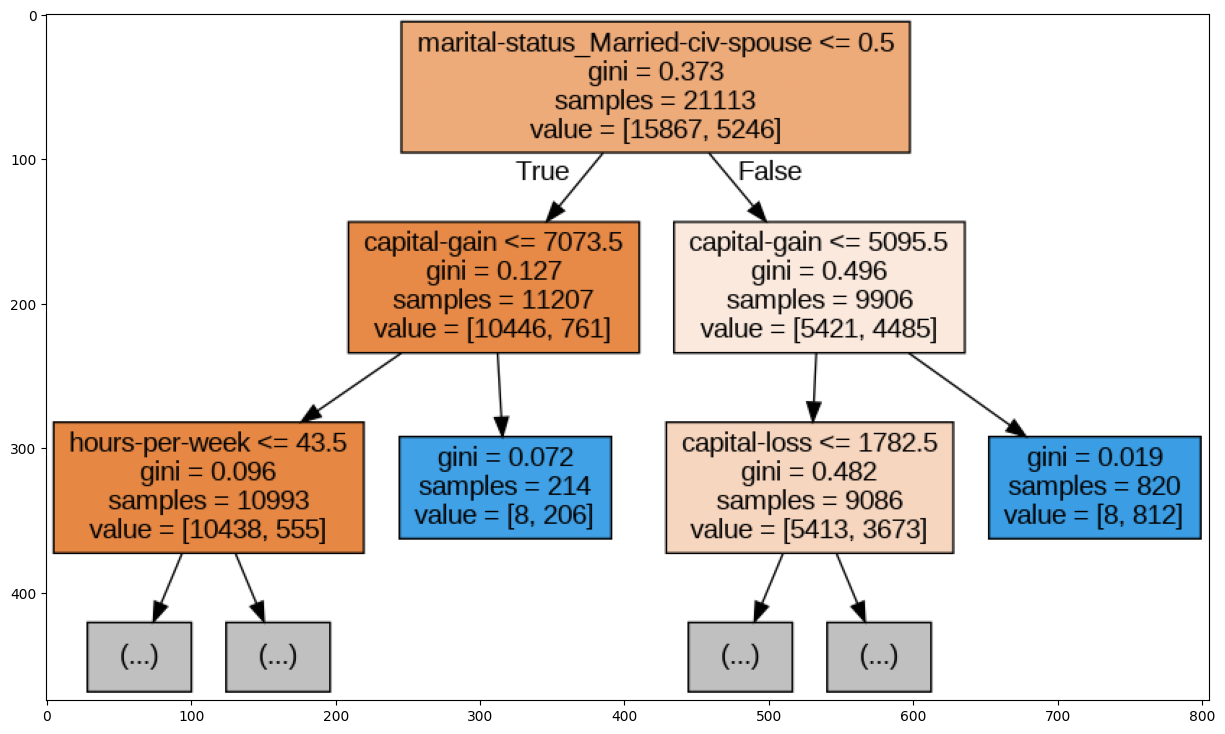

In [ ]:
#plot a tree (image) similar to one created for decision tree (graphwiz) for the pruning technique
best_decision_tree = tree.export_graphviz(best_ccp_alpha_tree, out_file='best_tree.dot', feature_names=X_train.columns, max_depth=2, filled=True)
!dot -Tpng best_tree.dot -o best_tree.png # to convert the file
image = plt.imread('best_tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

In [ ]:
print(best_ccp_alpha_tree.score(X_train,y_train))
print(best_ccp_alpha_tree.score(X_test,y_test))

0.8536446738975987
0.8482705271300697


# **End of Task**

> ©DJS Synapse 2024 - 2025